In [0]:
# Imports all in one place
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# "Linear" Regression

Which of the following is a linear regression model?

![Functional Form Misspecification](http://www.ryanleeallred.com/wp-content/uploads/2018/08/functional-form-misspecification.jpg)

-

-

-

-

-


**All** of these functional forms can be fit using Linear Regression. The "Linear" in linear regression refers to the linear form of the equation. 

## Linear Combinations

Remember when we rewrote vectors as a **linear combination** of scalars and unit vectors?

\begin{align}
v = \begin{bmatrix}2 \\ 3\end{bmatrix} = 2 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 3 \begin{bmatrix} 0 \\ 1\end{bmatrix} = 2\hat{i} + 3\hat{j} 
\end{align}

The syntax where we have a scalar (think coefficient) multiplying some vector (unit vector in this case) and all of them being added together is what makes this a linear combination.

## Linear Equations

A "Linear Equation" is any equation that takes the following form: 

\begin{align}
a_1x_1 + \ldots + a_nx_n + b = 0
\end{align}

Does this look familiar? A linear equation is one where we have $x_1, \ldots, x_n$ unknowns and $b, a_1, \ldots, a_n$ coefficients which are considered parameters of the equation. "The solutions of such an equation are the values that, when substituted to the unknowns, make the equality true."

[Linear Equation Wikipedia](https://en.wikipedia.org/wiki/Linear_equation)

Linear Regression is **linear** not because it can only plot straight lines and fit straight-line patterns in data, but because the form of the equation used to represent our regression is in the form of a **Linear Equation**.

## Well how do we fit curved data then?

# Polynomial Regression

Just as multiple regression was an extension of the bivariate case, Polynomial Regression is an extention of multiple regression and can be used to fit data to any (curved) shape. This is one of the reasons why data exploration is so important. You won't know that you need to fit a polynomial function to a feature unless you have examined its distribution.

[Why is polynomial regression considered a special case of multiple linear regression?](https://stats.stackexchange.com/questions/92065/why-is-polynomial-regression-considered-a-special-case-of-multiple-linear-regres)

## Lets look at an example!

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
print("Does this dataset look familiar?")
df.head()

(21613, 21)
Does this dataset look familiar?


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Find a "curved" feature in the dataset

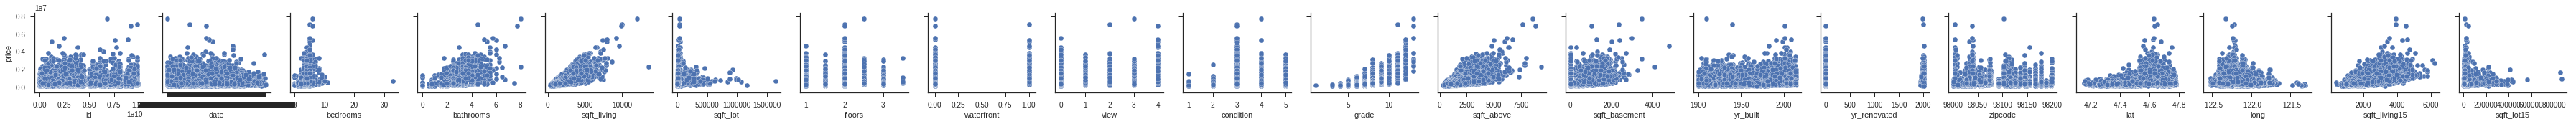

In [0]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns)

## Generate or "engineer" a new grade_squared feature 

In [0]:
df['grade_squared'] = df['grade']**2
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_squared
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,49
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,49
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,36
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,64


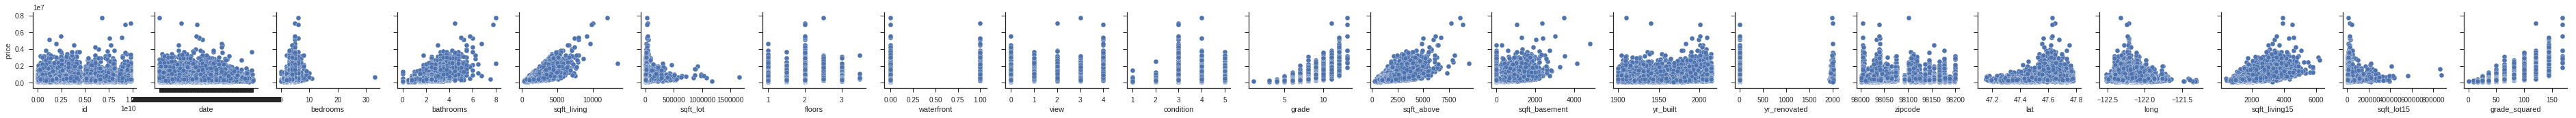

In [0]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns)

## Test the fit of a polynomial regression to that feature

First we'll fit a regular bivariate regression line and calculate its $R^2$ to get a baseline. Since we want to know if this generated feature is improving our model or not we'll first run our code without it so that we have something to compare to. 

$price_i = \beta_0 + \beta_1grade_i + \epsilon_i$

In [0]:
# Separate dependent and independent variables
y = df.loc[:, ['price']].values
X = df.loc[:, ['grade']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 286950.2116930928
R^2 is 0.45533658748438455


## Lets try fitting grade_squared as a bivariate model

$price_i = \beta_0 + \beta_1grade^{2}_i + \epsilon_i$

In [0]:
# Separate dependent and independent variables
y = df.loc[:, ['price']].values
X = df.loc[:, ['grade_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 281520.95512778487
R^2 is 0.4679230615763039


## Multiple Regression using both grade and grade_squred

$price_i = \beta_0 + \beta_1 grade_i + \beta_2grade^{2}_i + \epsilon_i$

In [0]:
# Separate dependent and independent variables
y = df.loc[:, ['price']].values
X = df.loc[:, ['grade', 'grade_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

print(model.coef_)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

[[-395212.37988798   36790.11053711]]
RMSE is 271924.77190892614
R^2 is 0.503578563254112


# How to find non-linear features

## 1) Domain Knowledge (think about your variables and hypothesize)

This is why having domain knowledge about the problem that you're trying to solve is something that's so important. In the context of home prices, variables that have a curved structure often are that way due to some form of diminishing returns increases in certain amenities. Lets think about the following variables:

- Lot Size:

The more land you're willing to buy all at once the cheaper it will be on a per-acre basis (Saving money when you buy in bulk). This trend carries through to small to medium sized lots but but with a more shallow curve.

![Price Per Acre](https://placercountyhomesandland.typepad.com/photos/uncategorized/price_per_acre_graph.png)

- Square Footage:

Square footage of a home sees a similar pattern. The value an additional 100 square feet in small homes (imagine the difference between say a 800 sq foot home and a 900 sq foot home) makes a big difference to buyers, where as an additional 100 square feet in a mansion probably isn't valued quite as highly. 

- Age:

Just like how the prices of new cars drop steeply in the first few years, the value of homes due to age drop quickly in the first few years after its built and then less quickly as time goes on. This is not a linear pattern and needs to be fitted by a polynomial model. 

## 2) Visual Inspection

We already talked about how generating scatterplots or other graphs is vital in our data exploration stage and can lead us to identify possible candidates for polynomials. Here I just wanted to share one more tip that can help you analyze scatterplots when you have a lot of data.

If you have so much data that it's hard to tell what's going on in your scatterplot, then sample your data and regenerate them to get a better idea.

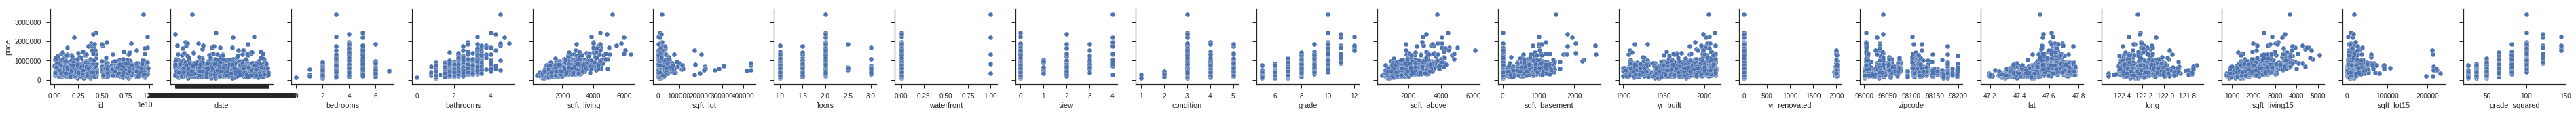

In [0]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Sample our dataframe to take 1/20th the values
sampled = df.sample(frac=0.05, replace=True, random_state=42)
# print(x_columns)

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=sampled, y_vars=['price'], x_vars=x_columns)

## 3) Inspect the distribution of residuals

![Poor Fit Residuals](http://www.thejavageek.com/wp-content/uploads/2018/02/linear-regression-results.png)

## An Aside: The "Hedonic Housing Model"

Using Linear Regression to model home prices is a very common use of predictive linear regression modeling. It's so common fact that it has its own name: The Hedonic Housing Model. In the Hedonic Housing model it is well understood and reiterated that certain features tend to be curved in nature and these polynomial features (like the ones mentioned above) have all been well explored in real estate prediction circles. This is another of how domain knowledge can give you an edge. The best way to gain domain knowledge is to dive in and try and solve one particular kind of problem, and pick up little tips and tidbits as time goes on.

# Log-Linear Regression

In a log-linear regression model, we take the natural log of all of our y variable and use that as our y vector instead of the raw y values. Why would we do that?

<https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/60861>

## 1) To reduce skew in y

Where we have variables with lots of relatively low values and few high values (like with home prices) we would expect to see our data more clustered on the left-hand side with a long tail extending to the right up into the expensive homes. The fact of the matter is that we will be able to make better predictions if we can normalize our data to some degree and one way to do this is by taking the natural log of it. 

In [0]:
## generate our ln(price) variable
df['ln_price'] = np.log(df['price'])

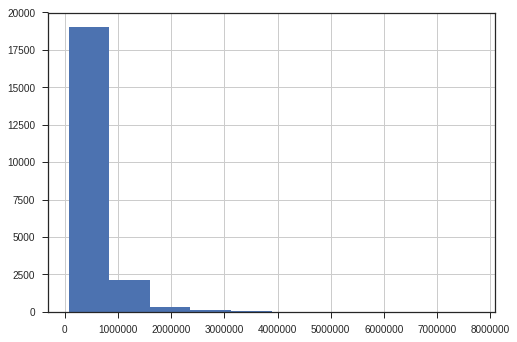

In [0]:
df.price.hist()

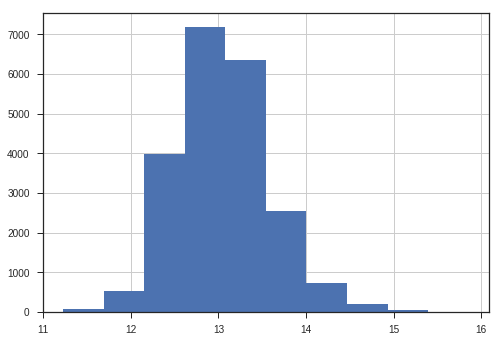

In [0]:
df.ln_price.hist()

## New distribution of variables

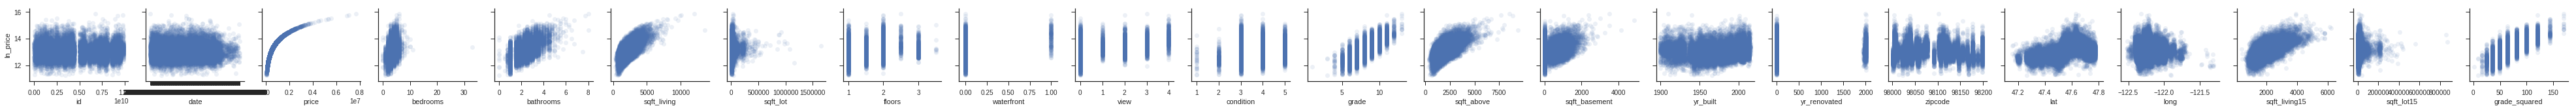

In [0]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('ln_price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns,
             plot_kws={'alpha': 0.1, 'linewidth':0})

## 2) Make coefficients easier to interpret

Transforming our price values in this way won't change our model's ability to generate predictions, but what it **will** do is change the interpretation of all of our x-coefficients. This will change our x-coefficients from having an elasticity type interpretation (a raw dollar amount change if there is a 1 unit increase in x) to having a percentage-terms interpretation. Lets demonstrate and talk about this further.

## 3) Make our errors easier to interpret

Errors that have been calculated on variables that are in log form can also be interpreted roughly as percentage error. We've been using percentages all our lives and they have immediate meaning to us. This is why I prefer log-linear regression models when possible.

<https://people.duke.edu/~rnau/411log.htm>

Feature Engineering is a big topic in machine learning. We won't be able to cover every aspect of it today, but hopefully we can give you a strong idea of what it is and how to go about it. 

[Understanding Feature Engineering Part 1](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)

Feature engineering is key to success in predictive modeling. It is the process by which we take existing features and combine them or alter them in ways that will expose additional signal to our model. Feature engineering is all about making the most of the data that we already had.

In [0]:
## Log-Linear Regression
# Separate dependent and independent variables
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['grade']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.37586964411597334
R^2 is 0.49828807222935523
coefficients:  [0.31345769]
intercepts:  [10.64457501]


This means that a one unit increase in the grade of a home increases its sale price by 31.3%. Often it is much easier to interpret coefficients in this manner than in the regular way. 

In [0]:
## Log-Linear Regression
# Separate dependent and independent variables
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['grade', 'grade_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.37516043671882215
R^2 is 0.5001795903640152
coefficients:  [0.17051944 0.00880731]
intercepts:  [11.21068351]


Our RMSE is really small now because it now represents error in percentage terms. WE're on agerage about 37.5% off in our predictions of house prices.

Our coefficients can also be understood in percentage terms which makes the coefficients on our regression much more digestable at a glance. 

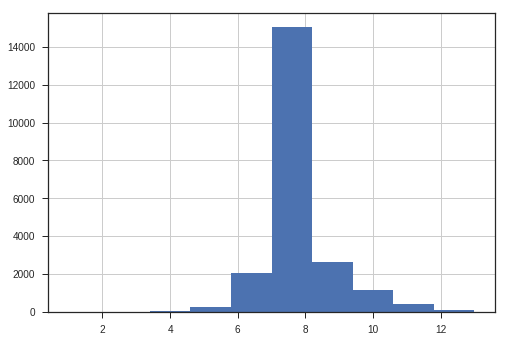

In [0]:
df['grade'].hist()

# Feature Engineering

## Polynomial Regression requires feature engineering

You've already seen an example of feature engineering today when we created the $grade^2$ variable. We took an existing feature and used it to generate a new feature that exposed the data to the model in a slightly different way. 

"Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data." - [Jason Brownlee](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)

What is some potential feature engineering that we could do on the King County dataset?

In [0]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_squared
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,49
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,49
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,36
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,64


- **[date]** The date is in a format that is not super useful to us. If were to extract the year we could then take the difference between year and yr_built to find the age of the home. We could also include the squared term of the home age since we know (from our hedonic housing model domain knowledge) that home age typically is not linear. 
- **[bedrooms]** & **[bathrooms]** We maybe use a combined measure of bedrooms and bathrooms, or find an average room square footage by taking total number of rooms and dividing by the square footage. 
- **[sqft_living]** **[sqft_lot]** The difference between lot square footage and home square footage ought to also give us a rough measure of the size of the yard. Rough measures are fine as long as the engineered features expose some new shred of meaning to our model.
- **[floors]** We could calculate an average number of square feet per floor
- **[lat]** **[long]** There are all kinds of things that we could do with the latitude and longitude especially if we use some kind of outside API or external dataset to bring in new features associated with the location of the homes. This would take a lot of work but these could potentially be very powerful features.

## Kaggle is one of the best places to get feature engineering ideas!!!

<https://www.kaggle.com/c/house-prices-advanced-regression-techniques>


## Lets generate some features!

[King County Dataset Variable Meanings](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [0]:
# Show columns so that we can reference them.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df['ln_price'] = np.log(df['price'])

print(df.columns)

df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_squared',
       'ln_price'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_squared,ln_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,49,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,49,13.195614
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,36,12.100712
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,13.311329
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,64,13.142166


In [0]:
# Non-Feature Engineered Model
# Separate dependent and independent variables
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 
       'sqft_living15', 'sqft_lot15', 'grade_squared',]].values

In [0]:
# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

# print("coefficients: ", model.coef_[0])
# print("intercepts: ", model.intercept_)

RMSE is 0.3295624842286476
R^2 is 0.6189500942654962


In [0]:
df['age'] = 2015 - df['yr_built']

In [0]:
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 
       'sqft_living15', 'sqft_lot15', 'grade_squared', 'age']].values

In [0]:
# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 0.3115730708326409
R^2 is 0.6594145018635686


## A note about $R^2$

$R^2$ If we add any feature to our model (even nearly meaningless ones) our $R^2$ will improve. For this reason raw $R^2$ is not the ultimate measure of goodness of fit. It is informative but completely secondary to our Root-Mean-Squared-Error (in predictive modeling). While a higher $R^2$ is generally better, this isn't the thing that we're trying to optimize. We care more about minimizing RMSE than maximizing $R^2$

### "Kitchen Sink" models

You may hear the term "kitchen sink" regression model used. This refers to a regression model that throws every available explanatory variable into the model in an attempt to improve it without much thought to whether those variables should really be considered as affecting y. Kitchen Sink models will have a higher $R^2$ than others but will have higher standard errors (estimates about particular coefficients may be less precise). 

Therefore, you tend to see "Kitchen Sink" models when the only priority is predictive accuracy and not interpretability. 

### Alternative measures of Goodness-of-fit

Efforts have been made to improve upon $R^2$ due to these limitations. A metric called "Adjusted $R^2$" seeks to account for the number of explanatory variables included in a model and adjust $R^2$ accordingly. This is something that you can look up if you're curious. I just wanted to make you aware of it more than anything.

## A note about dirty linear regression data

### Linear Regression models can only process numeric values

### Your data must be free of NaN values before being passed to the algorithm 

(some data cleaning will be required in today's assignment)

## Interaction Terms

An interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable.

Lets look at an example where we were trying to estimate the level of satisfaction that a person would have when eating some kind of food with a condiment (sauce) on it.

$satisfaction_i = \beta_0 + \beta_1 food_i + \beta_2condiment_i + \epsilon$

Imagine that we have two foods: Ice Cream and Hot Dogs, and we also have to condiments: hot fudge and mustard. 

$\beta_1$ in this example is trying to capture the effect of on satisfaction between eating hot dogs vs eating ice cream, and $\beta_2$ is trying to capture the effect of putting hot fudge (chocolate sauce) vs mustard on your food. 

$\beta_2$ is a little more problematic in this scenario. If someone were to come up to you and ask if you preferred hot fudge or mustard on your food, how would you answer?

You would probably say something like **"IT DEPENDS ON WHAT THE FOOD IS."** This means that the effect of our x variables on y (satisfaction) depends on the combination of food and condiment. I don't know about you guys, but I wouldn't be as satisfied if I had hot fudge on my hot dog or mustard on my ice cream. 

An interaction terms is something that we add to our regression to account for these "It Depends" moments between two x variables. We do this by multiplying the two of them together or *interacting* them with each other to capture the implications of the different combinations taking place.

$satisfaction_i = \beta_0 + \beta_1 food_i + \beta_2condiment_i + \beta_3(food\times condiment_i) + \epsilon$

<http://statisticsbyjim.com/regression/interaction-effects/>

# "Perfect Multicollinearity"

Perfect Multicollinearity is very related to the concept of linear dependence of matrix vectors. Columns that are perfectly multi-collinear can be created via a linear combination of other columns in the dataset. Columns that differ from one another another by a constant amount (scalar) will be perfectly multicollinear with each other. 

It is easy to accidentally create perfectly multicollinear columns by doing unit conversions and then not dropping one or the other columns. You should not include columns that are perfectly multicollinear in your regression but should drop one or the other.

Below is an example of us (accidentally) creating perfectly multicollinear columns. This is bad. Don't do this. 

In [0]:
## Perfect Multicollinearity example
df['bedrooms_x5'] = df['bedrooms']*5

## Non-Feature Engineered Model
# Separate dependent and independent variables
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'age', 'age_squared',
       'total_bed_bath', 'renovation_size', 'hasBasement', 'sqft_lot_squared',
       'sqft_living_squared', 'sqft_lot_squared15', 'sqft_living_squared15', 'bedrooms_x5']].values

#        'sqft_per_bedbath',   

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.3068752013122925
R^2 is 0.6655713240972714
coefficients:  [-2.37375412e-03  3.20374005e-02  1.47467689e-04  3.88084389e-07
  7.69548847e-02  3.43540063e-01  4.19521727e-02  4.79642951e-02
  2.01427816e-01  7.94444849e-05  6.80458388e-05 -3.72352974e-04
  1.67541742e-05  2.84058299e-04  2.03030200e-04 -7.69077715e-07
  3.72352974e-04  4.06699949e-05  2.96635144e-02  5.55398752e-05
  9.42649902e-02 -3.95225519e-13 -6.10803130e-09  8.22610209e-13
 -3.24171621e-08 -1.18687706e-02]
intercepts:  [-16.79045252]


## Showing Perfect Multi-Collinearity Graphically

What perfect Multicollinearity really means is that two columns are linearly dependant with each other (from a linear algebra perspective). This means that the determinant of the X matrix will be zero causing it to therefore not be invertible. This will cause grave problems for models that are calculated using the linear algebra approach to Ordinary-Least-Squares regression.

We can show that two columns are perfectly multicollinear by plotting the two variables against each other in a scatterplot and seeing that all of the cata points lie on the same line. (They're co-linear) 

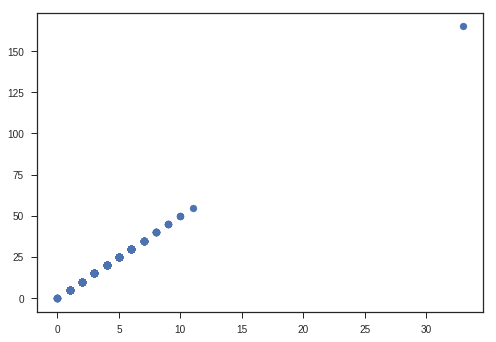

In [0]:
import matplotlib.pyplot as plt
plt.scatter(df['bedrooms'], df['bedrooms_x5'])
plt.show()

## The "Dummy Variable Trap"

Another way that perfectly multicollinear features can be created is by one-hot-ecoding a binary variable. (don't do this) If we one-hot-encode a binary variable we will end up with two columns that are perfect opposites of each other. 

With any categorical variable that is represented as dummy variables, perfect multi-collinearity will exist between the dummy-variable (binary) features of that categorical variable. So if you have used one-hot encoding to turn categorical variables into dummy variables, you will need to drop one of the resulting features to avoid this problem. 

Research the phrase "The Dummy Variable Trap" to learn more about this topic. 

## Removing Outliers

To remove outliers via the 1.5*Interquartile-Range method. The first step is to calculate the IQR for each variable.

The IQR is the difference between the 25th and 75th percentiles of the feature.

Find the IQR and multiply it by 1.5

Then add the 1.5xIQR to the 3rd quartile (75th percentile). Anything above that range is an outlier.
Subtract 1.5xIQR from the 1st quartile (25th percentile). Anything below that value is also an outlier.

You want to minimize outliers in your dataset, so remove them by dropping observations that contain outliers in key features.

Typically you will wan to remove outliers before doing anything else with your dataset. We haven't focused on this strongly yet in the class, but coefficients get strongly biased by outliers so if you want to really have accurate predictions, remove outliers before you begin your feature engineering and modeling.

## Major Takeaways

- Polynomial Regression
  - Linear Regression can fit curved lines.
  - Including squared and cubed terms can improve fit and accuracy.

- Log-linear Regression
  - ln(y) helps normalize data with a skewed y variable.
  - ln(y) changes interpretation of coefficients and errors to be percentages.

- Feature Engineering
  - Generating Features improves model accuracy if done well.
  - This is where creativity and domain knowledge really pay off.
  
- Interaction Terms
  - When you think that certain combinations of x variables might affect y differently than how they do separately. Include an interaction term.